In [3]:
#User Input
#lib_type = "single_end"
#seq_platform = "illumina"
#read_length = 100

In [4]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("dada2")
#install.packages("phyloseq")
#biocLite("biom")
#biocLite("themetagenomics")

In [5]:
library("dada2")
library("phyloseq")
library("themetagenomics")

In [8]:
#Read in files

input_files = c("./ERR520895.fastq", "./ERR521461.fastq")
file_names = c("ERR520895", "ERR521461")

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


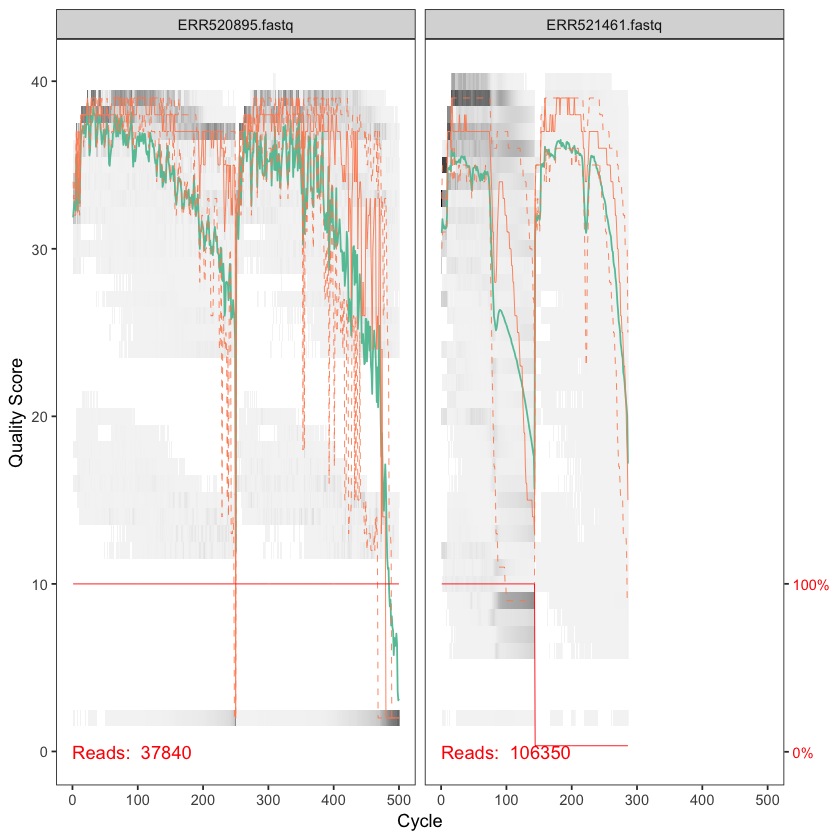

In [9]:
#Plot quality profiles of files

plotQualityProfile(input_files)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


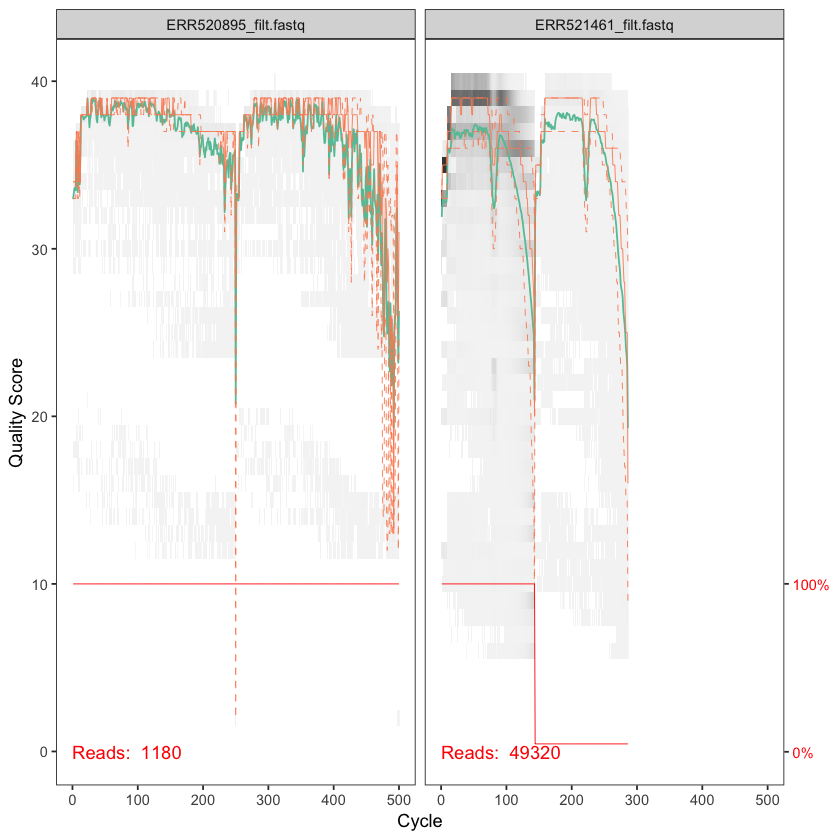

In [13]:
#Filter and Trim the reads

filtFs = paste0(file_names,"_filt.fastq")
filterAndTrim(input_files, filtFs,
                     maxN=0, maxEE=c(2,2), truncQ=1, rm.phix=TRUE, compress=FALSE, verbose=TRUE, multithread=TRUE)
plotQualityProfile(filtFs)

Not all sequences were the same length.
7961221 total bases in 50500 reads from 2 samples will be used for learning the error rates.
Initializing error rates to maximum possible estimate.
selfConsist step 1 ..
   selfConsist step 2
   selfConsist step 3
   selfConsist step 4
Convergence after  4  rounds.


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

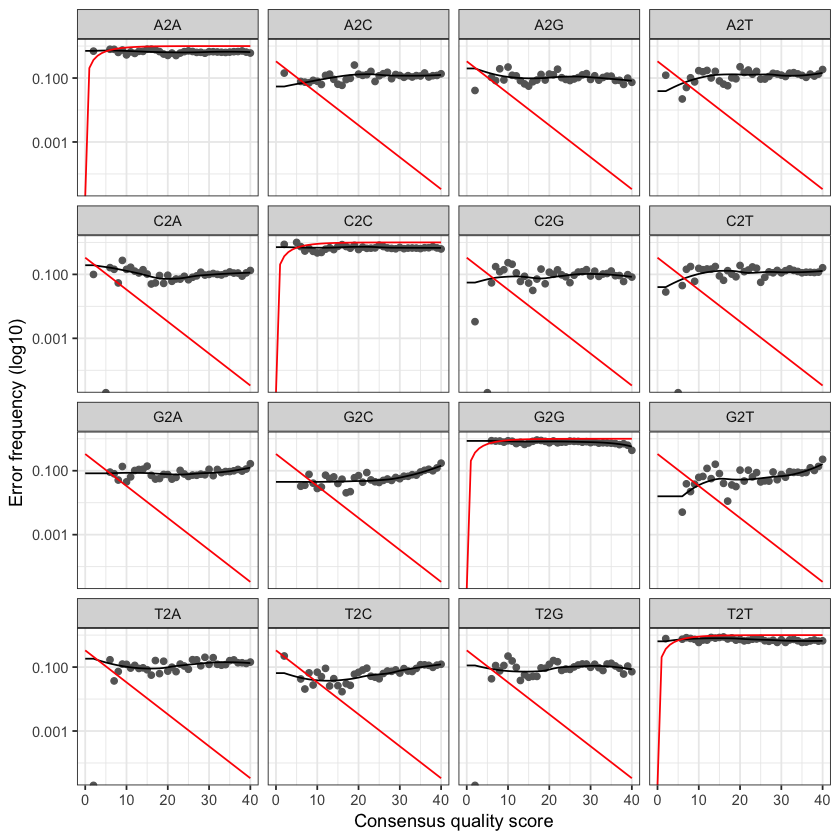

In [14]:
#Parse filtered files to learn error rates, infer sequence variants and construct a seq-table

#filtered_files = list.files(filtpath, pattern="fastq.gz", full.names=TRUE)
#samples = sapply(basename(filtFs))
#names(filtFs) = basename(input_files)

error_rates = learnErrors(filtFs, multithread=TRUE, randomize=TRUE)
plotErrors(error_rates, nominalQ=TRUE)


In [30]:
seq_variants = vector("list", length(file_names))
names(seq_variants) = filtFs

for (i in filtFs){
    #dereplicated = derepFastq(filtFs[[i]])
    dereplicated = derepFastq(i)
    seq_variants[[i]] = dada(dereplicated, err=error_rates, multithread=TRUE)}
    
sequence_table = makeSequenceTable(seq_variants)

Sample 1 - 1180 reads in 1076 unique sequences.
Not all sequences were the same length.
Sample 1 - 49320 reads in 49206 unique sequences.


The sequences being tabled vary in length.


In [53]:
#Remove chimeras and assign taxonomy
#system("wget https://zenodo.org/record/158955/files/gg_13_8_train_set_97.fa.gz?download=1")
sequence_table = removeBimeraDenovo(sequence_table, method="consensus", multithread=TRUE)
taxa_assign = assignTaxonomy(sequence_table, "gg_13_8_train_set_97.fa.gz", multithread=TRUE)


In [51]:
#Create Metadata and Get OTU Table
phyloseqobj = phyloseq(otu_table(sequence_table, taxa_are_rows=FALSE, tax_table(taxa_assign)))
otu = otu_table(phyloseqobj)
otu
#taxa.gg13_8.id <- assignTaxonomy(colnames(sequence_table), refFasta="/Users/ashika/Documents/PrIMP/gg_13_5_otus/rep_set/99_otus.fasta")
#taxa.gg13_8.id

,AGATACGTTTGGTTTCCAAGAACGACAAACGCAATCGCCTCTTTAGCGTCTGAGGAATAACCGAGCGACTCTTGAGTAATTAACGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCAT,TGGATGGAACTTGGAATAATATAGAAGCTCTTGCCTGTCTTTCTGGCAAAACTACGAAGCAGTACGCCGACAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAA,TAAGCTCCAGAAGGAGTTGCTGCACCGTTATGACGATACCCGACTCACCACCGTGGCGATGCATCCACATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TATTTGATCATTCCGGTAGGGTCCATTCGATGTTGATTCCATTGGAGTGCATTCGATGATTCCATTCGATTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TCCTACAAACCTGCGTTCGTCGGTTACGGTAATCAATACGTTGCTTAACGGAGTTATGGGCGGACATTTACACAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAA,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAACCCTGTTTGCTACCCATGCTTTCGAGCCTCAGCGTCAGTTGGTGCCCAGTAGACCGCCTTCGCCACTGGTGTTCCTCCCGATATCTACGCATTCCACCGCTACACCGGGAATTCCATCTACCTCTGCACTACTCAAGAAAAACAGTTTTGAAAGCAATTCATGGGTTGAGCCCATGGTTTTCACTTCCAACTTGTCTTCCCGCCTGCGCTCCCTTTACACCCAGTAATTCCGGACAACGCTTGCACCCTAC,TCTGGCTAGATCTAATTTTTGTATTTTTAATAGAGATGGGGTTTCACCATGTTGGCCAGACTGGTCTCAAACTCCTGACCTCATTATAGGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTC,TAACGGGCAATTAACCGCAAAGTCATATTTACTGCAACAGCAGCTCAGGCCATCGACTTTGCCAGTGTACGAGCAAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACCCTGTTTGCTCCCCACGCTTTCGCACCTGAGCGTCAGTCTTCGTCCAGGGGGCCGCCTTCGCCACCGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTGGAATTCTACCCCCCTCTACGAGACTCAAGCTTGCCAGTATCAGATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCTGACTTAACAAACCGCCTGCGTGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCCCCCCCC,TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGGGAACGCAGGCGGTCTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGAAGTAGTGCATTGGAAACTGGAAGACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAAGCGGCTCTCTGGTCTGTAACTGACGCTGAGGTTCGAAAGCGTGGGTAGCAAACCCTGTTTGCTACCCACGCTTTCGAACCTCAGCGTCAGTTACAGACCAGAGAGCCGCTTTCGCCACTGGTGTTCTTCCATATATCTACGCATTTCACCGCTACACATGGAGTTCCACTCTCCTCTTCTGCACTCAAGTCTTCCAGTTTCCAATGCACTACTTCGGTTAAGCCGAAGGCTTTCACATCAGACTTAAAAGACCGCCTGCGTTCCCTTTACGCCCAATAAATCCGGACAACGCTCGCCCCCCCC,⋯,TAAGGCTTTTTGCCGTAGAACTCCGTCACTCGTTCTATAAACGAACGCAAGTCAGTAATAAAAGCCTCATCACTCACGAGCAAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTT,TCCCGAAAGTCGTATTCAAGTCACCAGTCACTTGAGACTCCTAATCCCTAATCCCTAATCCCTAGTCACTAGTCACTAGTCACTAGTCACATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTA,TGCTGACTGTAGCTAATGCAGCACCGGAAATGCCGAGCGCAGGGAAGCCGAAGTGCCCGTTGATCAGTAGATAGTTCAAAATAATATTGATACGATTTTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTG,TGATGTTGAGCGAACGGGCAAAGCCCTTGGCAAAGCTCACACCCACGAGCAGAGAACCCATCAAGCCCGGTCCACGGGTGAAGGCAACGATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTAT,TGCAATCGTGAGCCTGGCGGAAGATCCTGTCTTTCTCCTCCTCTTCTTTCTGCTTTTTCTCAGCCTTTTCCAAATACACTAGATTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCATT,TAAAGATAGAGGATTCGAAACGCGCGTCTTCTTGTTCTTCGTCTTGCTTTTTCTTTGCCTTCGGAGCGGGGTCGTTGAGGTGAATGCGGATTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTAT,TGCTGGTGTTGGAGTTGCTTTTACGGCAAAATATTCCTTAAACCCTTTATTCCAAGCAAAGGCTTTGTTCAAAGCGCGAGCCTTTTATCTGCGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGC,TGATTCCGTGCTTGGAACAAAGAAATGATGCACAATCCTATCAAGGATGGCACGATATTTCGCCATGACTGGATTCGCTATCTGCGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCA,TGGCACAAGGAATGGAGCCACGCATCTTCTTGTCGGTCAGAGAACAGATGTCGTTATGGCCAAACTCGATGTTTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAA,TAAAACCGCCATCTGCCAGGTTCATGCAACACCATGATAGTGGTAAAGAAATTAACGACTGAGGTTATTCCTCATTTTGGCACTTGCCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTAT
ERR520895_filt.fastq,0,0,0,0,0,10,0,0,6,6,⋯,0,

In [ ]:
#Get pathway annotation using picrust


system.time(FUNCTIONS <- picrust(otu,rows_are_taxa=FALSE,
                                 reference='gg_ko', reference_path="./refs",
                                 cn_normalize=TRUE,sample_normalize=FALSE,
                                 drop=TRUE))


Warning message in cnn(otu_table, rows_are_taxa = FALSE, drop = drop):
“OTU IDs must be integer strings of the form GreenGenes 16.X. Returning unnormalized OTU table.”